In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"Datasets\integrated_traffic_dataset (1).csv")   # or pd.read_csv("your_file.csv")

print("--- Missing Value Inspection (Before Cleaning) ---")
print(df.isna().sum())

# 1️⃣ Drop rows where small number of missing values exist
df = df.dropna(subset=[
    "Location", "Latitude", "Longitude", "Day_of_Week",
    "Incident_Congestion", "Road_Condition", "Accident_Severity",
    "Accident_Reason", "Summary_Road_Name", "Daily_Traffic_Volume",
    "Daily_Average_Speed", "Daily_Congestion_Level",
    "Daily_Incident_Reports", "Daily_Public_Transport_Usage",
    "Daily_Parking_Usage"
])

# 2️⃣ Fill categorical columns with mode (most frequent value)
df["Vehicle_Damage"].fillna(df["Vehicle_Damage"].mode()[0], inplace=True)
df["Driver_Violation"].fillna("Unknown", inplace=True)

# --- Handling Missing Values Properly ---
df["Vehicle_Damage"] = df["Vehicle_Damage"].fillna(df["Vehicle_Damage"].mode()[0])
df["Driver_Violation"] = df["Driver_Violation"].fillna("Unknown")
df["Number_of_Deaths"] = df["Number_of_Deaths"].fillna(df["Number_of_Deaths"].mean())
df["Number_of_Injuries"] = df["Number_of_Injuries"].fillna(df["Number_of_Injuries"].mean())
df["Daily_Traffic_Volume"] = df["Daily_Traffic_Volume"].fillna(df["Daily_Traffic_Volume"].mean())
df["Daily_Average_Speed"] = df["Daily_Average_Speed"].fillna(df["Daily_Average_Speed"].median())
df["Daily_Congestion_Level"] = df["Daily_Congestion_Level"].fillna(df["Daily_Congestion_Level"].mean())
df["Daily_Incident_Reports"] = df["Daily_Incident_Reports"].fillna(df["Daily_Incident_Reports"].median())
df["Daily_Public_Transport_Usage"] = df["Daily_Public_Transport_Usage"].fillna(df["Daily_Public_Transport_Usage"].mean())
df["Daily_Parking_Usage"] = df["Daily_Parking_Usage"].fillna(df["Daily_Parking_Usage"].mean())


# 4️⃣ Reset index after cleaning
df.reset_index(drop=True, inplace=True)

print("\n--- Missing Value Inspection (After Cleaning) ---")
print(df.isna().sum())


--- Missing Value Inspection (Before Cleaning) ---
record_id                          0
Timestamp                          0
Location                           0
Latitude                           0
Longitude                          0
Day_of_Week                        0
Hour_of_Day                        0
Incident_Congestion                0
Weather_Condition                  0
Road_Condition                     0
Vehicle_Type                       0
Vehicle_Damage                  2008
Accident_Severity                  0
Accident_Reason                    0
Driver_Violation                5056
Number_of_Deaths                   0
Number_of_Injuries                 0
Summary_Road_Name                  0
Daily_Traffic_Volume               0
Daily_Average_Speed                0
Daily_Congestion_Level             0
Daily_Incident_Reports             0
Daily_Public_Transport_Usage       0
Daily_Parking_Usage                0
dtype: int64

--- Missing Value Inspection (After Cleaning) -

C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\729249843.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Vehicle_Damage"].fillna(df["Vehicle_Damage"].mode()[0], inplace=True)
C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\729249843.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [4]:
# Replace Unknown with "No Violation"
df["Driver_Violation"] = df["Driver_Violation"].replace("Unknown", "Not Recorded")


In [5]:
print("\n--- Missing Value Inspection (After Cleaning) ---")
print(df.isna().sum())



--- Missing Value Inspection (After Cleaning) ---
record_id                       0
Timestamp                       0
Location                        0
Latitude                        0
Longitude                       0
Day_of_Week                     0
Hour_of_Day                     0
Incident_Congestion             0
Weather_Condition               0
Road_Condition                  0
Vehicle_Type                    0
Vehicle_Damage                  0
Accident_Severity               0
Accident_Reason                 0
Driver_Violation                0
Number_of_Deaths                0
Number_of_Injuries              0
Summary_Road_Name               0
Daily_Traffic_Volume            0
Daily_Average_Speed             0
Daily_Congestion_Level          0
Daily_Incident_Reports          0
Daily_Public_Transport_Usage    0
Daily_Parking_Usage             0
dtype: int64


C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\1529070826.py:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\1529070826.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_counts, x='Day_of_Week', y='Accident_Count', order=days_order, palette="Blues")


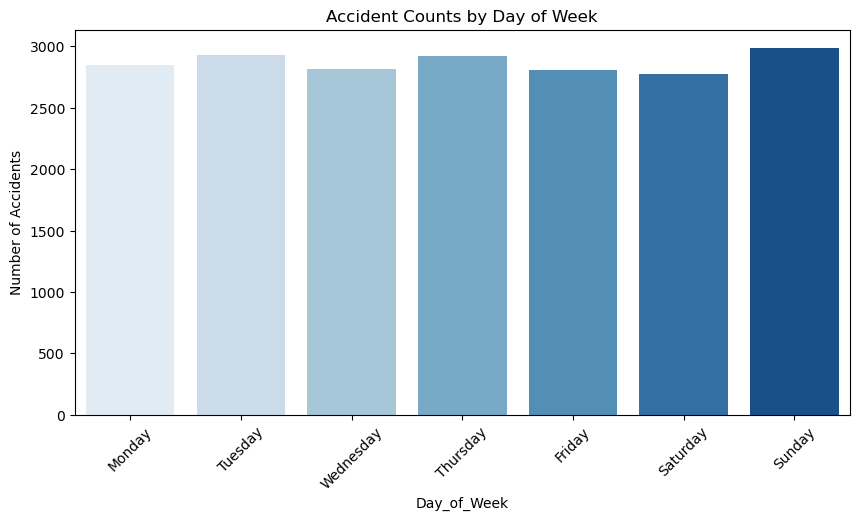

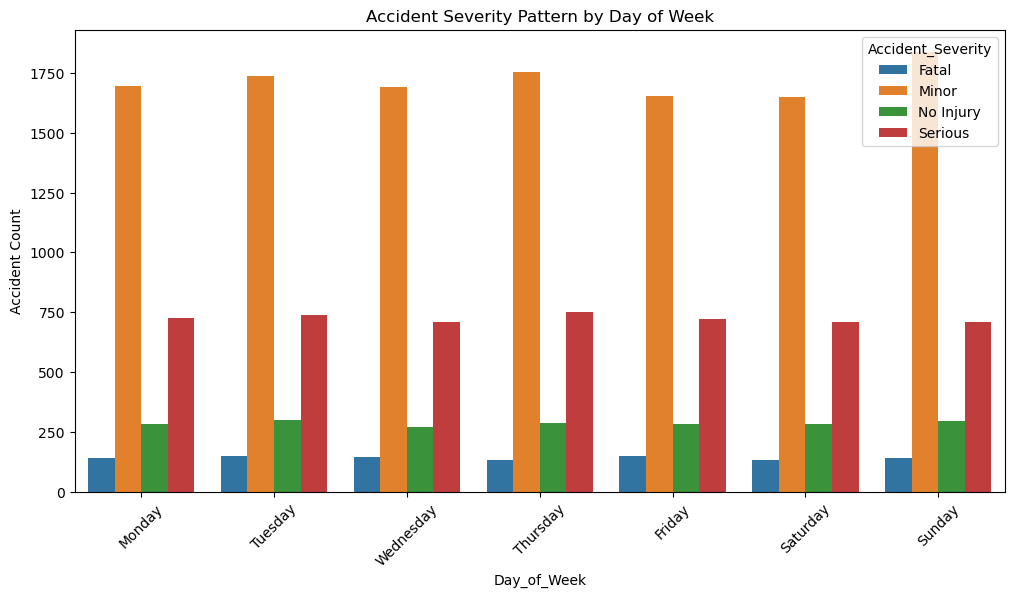

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded with your full dataset
# Make sure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Day_of_Week (if not already in dataset)
df['Day_of_Week'] = df['Timestamp'].dt.day_name()

# Count accidents per day
weekly_counts = df.groupby('Day_of_Week').size().reset_index(name='Accident_Count')

# Accident severity by week
severity_weekly = df.groupby(['Day_of_Week', 'Accident_Severity']).size().reset_index(name='Count')

# Order days for better plotting
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot total accident counts
plt.figure(figsize=(10,5))
sns.barplot(data=weekly_counts, x='Day_of_Week', y='Accident_Count', order=days_order, palette="Blues")
plt.title("Accident Counts by Day of Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

# Plot severity distribution by week
plt.figure(figsize=(12,6))
sns.barplot(data=severity_weekly, x='Day_of_Week', y='Count', hue='Accident_Severity', order=days_order)
plt.title("Accident Severity Pattern by Day of Week")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.show()


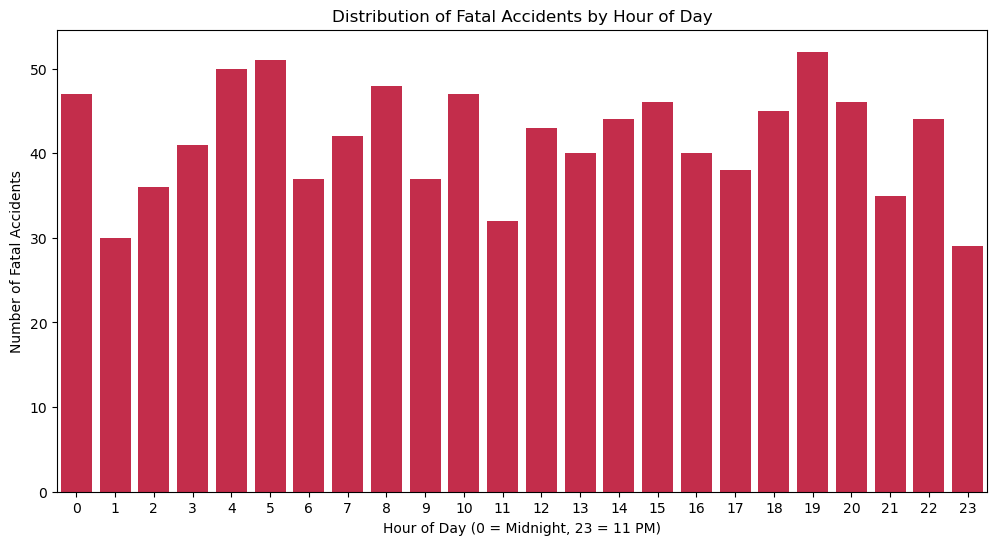

In [7]:
# Filter only fatal accidents
fatal_df = df[df['Number_of_Deaths'] > 0]

# Count fatal accidents by hour
fatal_by_hour = fatal_df.groupby('Hour_of_Day').size().reset_index(name='Fatal_Accidents')

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=fatal_by_hour, x='Hour_of_Day', y='Fatal_Accidents', color="crimson")
plt.title("Distribution of Fatal Accidents by Hour of Day")
plt.xlabel("Hour of Day (0 = Midnight, 23 = 11 PM)")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(range(0,24))
plt.show()


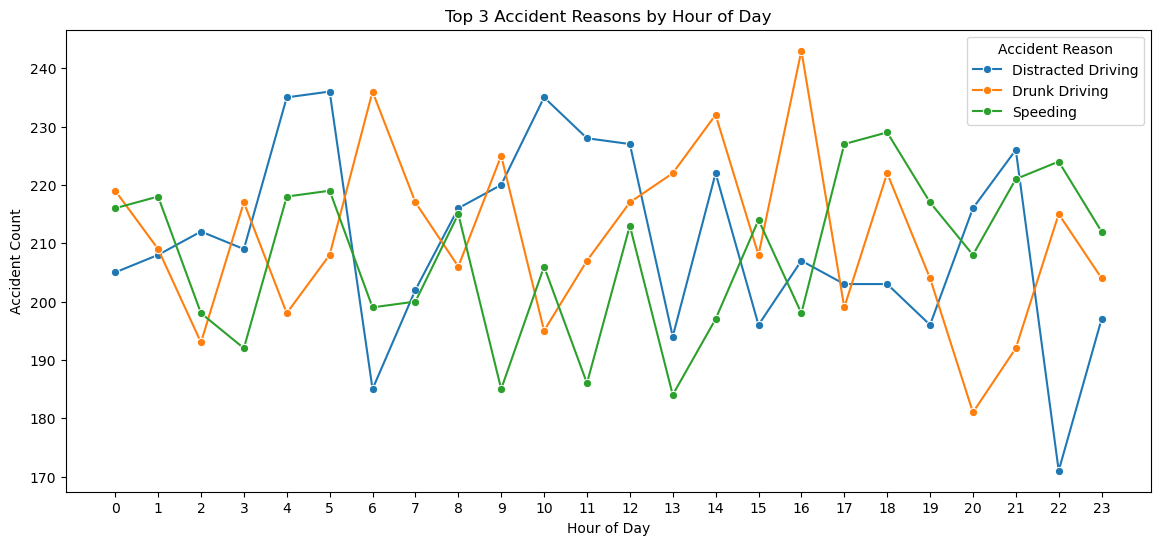

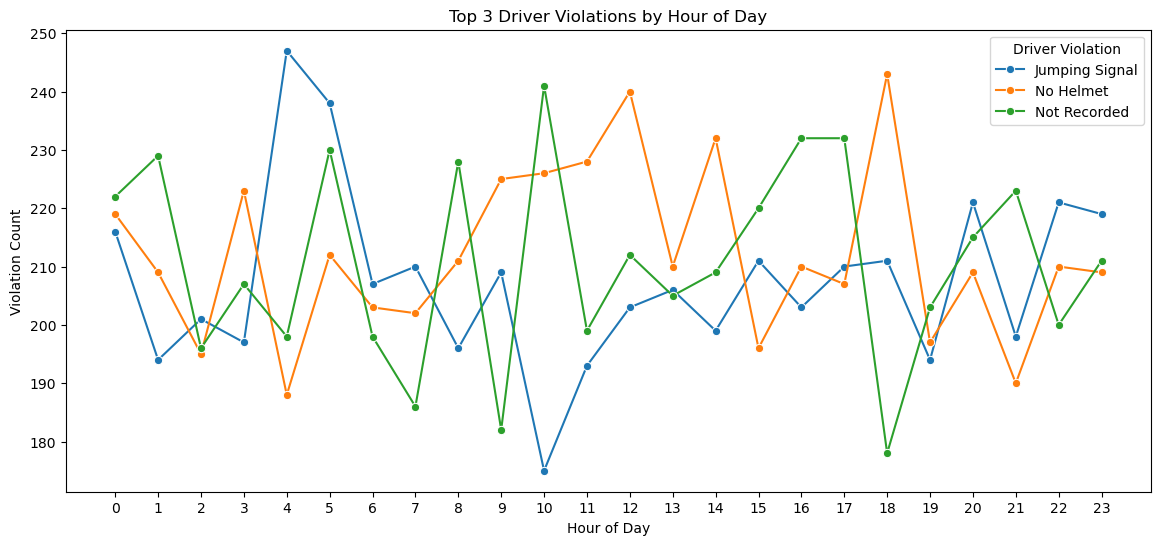

In [8]:
# ---- Accident Reasons ----
# Count accident reasons by hour
reason_counts = df.groupby(['Hour_of_Day', 'Accident_Reason']).size().reset_index(name='Count')

# Get top 3 reasons overall
top_reasons = reason_counts.groupby('Accident_Reason')['Count'].sum().nlargest(3).index

# Filter only top 3
reason_counts_top = reason_counts[reason_counts['Accident_Reason'].isin(top_reasons)]

# Plot top 3 accident reasons by hour
plt.figure(figsize=(14,6))
sns.lineplot(data=reason_counts_top, x='Hour_of_Day', y='Count', hue='Accident_Reason', marker="o")
plt.title("Top 3 Accident Reasons by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Accident Count")
plt.xticks(range(0,24))
plt.legend(title="Accident Reason")
plt.show()


# ---- Driver Violations ----
# Count driver violations by hour
violation_counts = df.groupby(['Hour_of_Day', 'Driver_Violation']).size().reset_index(name='Count')

# Get top 3 violations overall
top_violations = violation_counts.groupby('Driver_Violation')['Count'].sum().nlargest(3).index

# Filter only top 3
violation_counts_top = violation_counts[violation_counts['Driver_Violation'].isin(top_violations)]

# Plot top 3 driver violations by hour
plt.figure(figsize=(14,6))
sns.lineplot(data=violation_counts_top, x='Hour_of_Day', y='Count', hue='Driver_Violation', marker="o")
plt.title("Top 3 Driver Violations by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Violation Count")
plt.xticks(range(0,24))
plt.legend(title="Driver Violation")
plt.show()


C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\2255672753.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accident_counts, x='is_holiday', y='Accident_Count', palette="Set2")


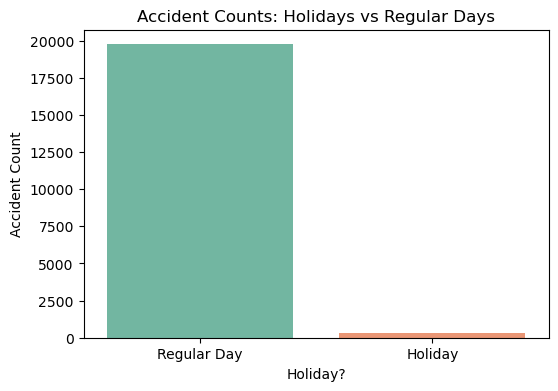

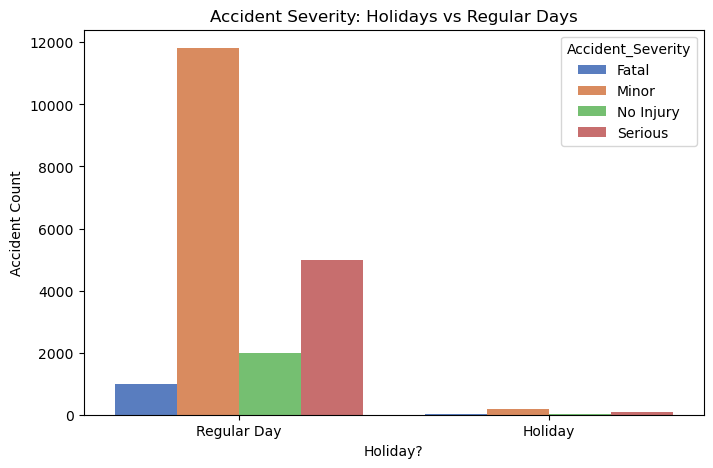

In [9]:
# Example: Define a holiday list (replace with real ones in your dataset)
holidays = [
    "2023-01-01", "2023-01-26", "2023-08-15", "2023-10-02", "2023-11-12", "2023-12-25"
]
holidays = pd.to_datetime(holidays)

# Create Holiday Flag
df['is_holiday'] = df['Timestamp'].dt.date.isin(holidays.date)

# Accident counts comparison
accident_counts = df.groupby('is_holiday').size().reset_index(name='Accident_Count')

# Severity comparison
severity_counts = df.groupby(['is_holiday', 'Accident_Severity']).size().reset_index(name='Count')

# ---- Plot total accident counts ----
plt.figure(figsize=(6,4))
sns.barplot(data=accident_counts, x='is_holiday', y='Accident_Count', palette="Set2")
plt.title("Accident Counts: Holidays vs Regular Days")
plt.xlabel("Holiday?")
plt.ylabel("Accident Count")
plt.xticks([0,1], ["Regular Day", "Holiday"])
plt.show()

# ---- Plot severity distribution ----
plt.figure(figsize=(8,5))
sns.barplot(data=severity_counts, x='is_holiday', y='Count', hue='Accident_Severity', palette="muted")
plt.title("Accident Severity: Holidays vs Regular Days")
plt.xlabel("Holiday?")
plt.ylabel("Accident Count")
plt.xticks([0,1], ["Regular Day", "Holiday"])
plt.show()


C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\2743900680.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_response, x='Rush_Period', y='Daily_Incident_Reports', palette="coolwarm")


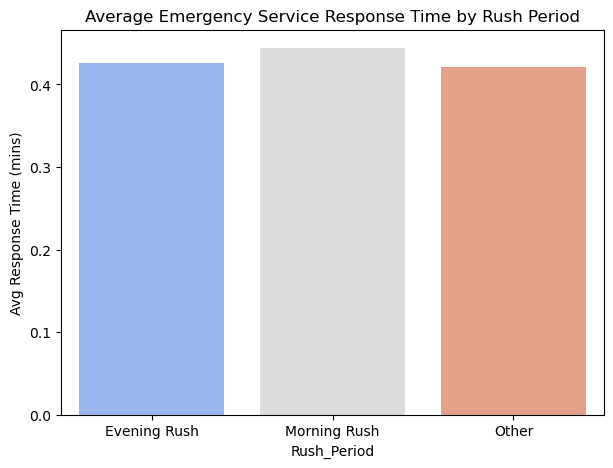

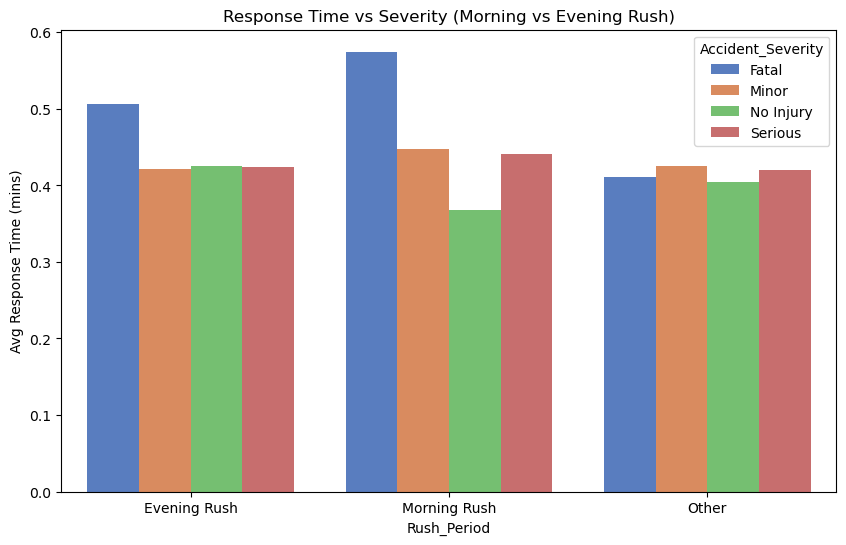

Correlation between Response Time and Accident Severity: 0.01


In [10]:
# Define rush hours
def rush_period(hour):
    if 7 <= hour <= 10:
        return "Morning Rush"
    elif 17 <= hour <= 20:
        return "Evening Rush"
    else:
        return "Other"

# Apply function
df['Rush_Period'] = df['Hour_of_Day'].apply(rush_period)

# Average response time by rush period
avg_response = df.groupby('Rush_Period')['Daily_Incident_Reports'].mean().reset_index()

# Response time by severity + rush period
response_severity = df.groupby(['Rush_Period', 'Accident_Severity'])['Daily_Incident_Reports'].mean().reset_index()

# ---- Plot 1: Average Response Time ----
plt.figure(figsize=(7,5))
sns.barplot(data=avg_response, x='Rush_Period', y='Daily_Incident_Reports', palette="coolwarm")
plt.title("Average Emergency Service Response Time by Rush Period")
plt.ylabel("Avg Response Time (mins)")
plt.show()

# ---- Plot 2: Response Time by Severity ----
plt.figure(figsize=(10,6))
sns.barplot(data=response_severity, x='Rush_Period', y='Daily_Incident_Reports', hue='Accident_Severity', palette="muted")
plt.title("Response Time vs Severity (Morning vs Evening Rush)")
plt.ylabel("Avg Response Time (mins)")
plt.show()

# ---- Correlation between response time & severity ----
# Encode severity as numeric (example: Minor=1, Moderate=2, Severe=3, Fatal=4)
severity_map = {"Minor": 1, "Moderate": 2, "Severe": 3, "Fatal": 4}
df['Severity_Code'] = df['Accident_Severity'].map(severity_map)

# Correlation calculation
corr = df[['Daily_Incident_Reports', 'Severity_Code']].corr().iloc[0,1]
print(f"Correlation between Response Time and Accident Severity: {corr:.2f}")


  Road_Condition  Daily_Average_Speed  Daily_Congestion_Level
0            Dry            27.904678               55.644372
1            Wet            27.561511               56.182601


C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\3039297977.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=road_stats, x='Road_Condition', y='Daily_Average_Speed', ax=axes[0], palette="Blues")
C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\3039297977.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=road_stats, x='Road_Condition', y='Daily_Congestion_Level', ax=axes[1], palette="Reds")


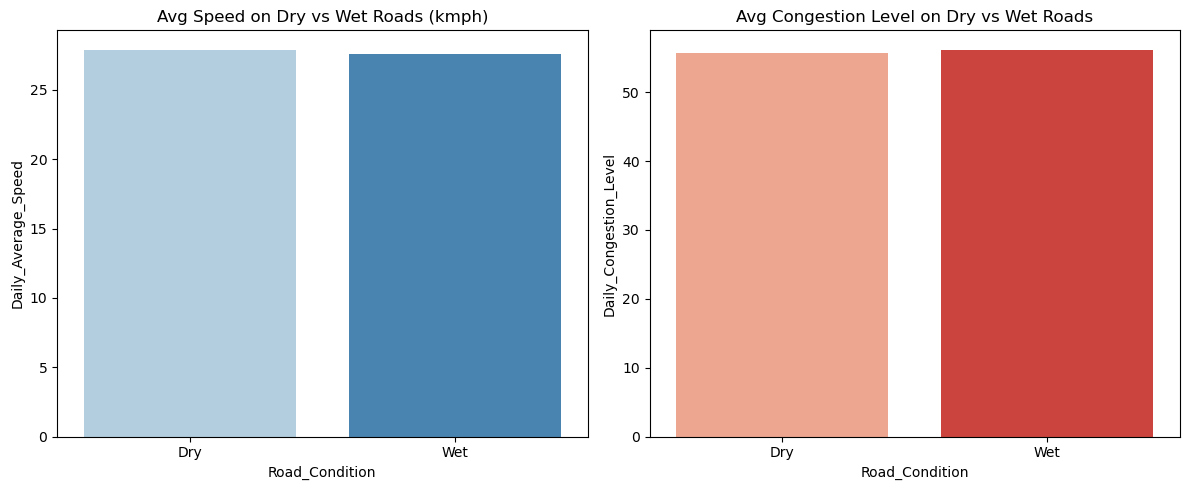

In [11]:
# Filter only Dry and Wet roads
road_df = df[df['Road_Condition'].isin(['Dry', 'Wet'])]

# Group by condition and calculate averages
road_stats = road_df.groupby('Road_Condition')[['Daily_Average_Speed', 'Daily_Congestion_Level']].mean().reset_index()

print(road_stats)

# ---- Plot comparison ----
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Average speed comparison
sns.barplot(data=road_stats, x='Road_Condition', y='Daily_Average_Speed', ax=axes[0], palette="Blues")
axes[0].set_title("Avg Speed on Dry vs Wet Roads (kmph)")

# Congestion comparison
sns.barplot(data=road_stats, x='Road_Condition', y='Daily_Congestion_Level', ax=axes[1], palette="Reds")
axes[1].set_title("Avg Congestion Level on Dry vs Wet Roads")

plt.tight_layout()
plt.show()


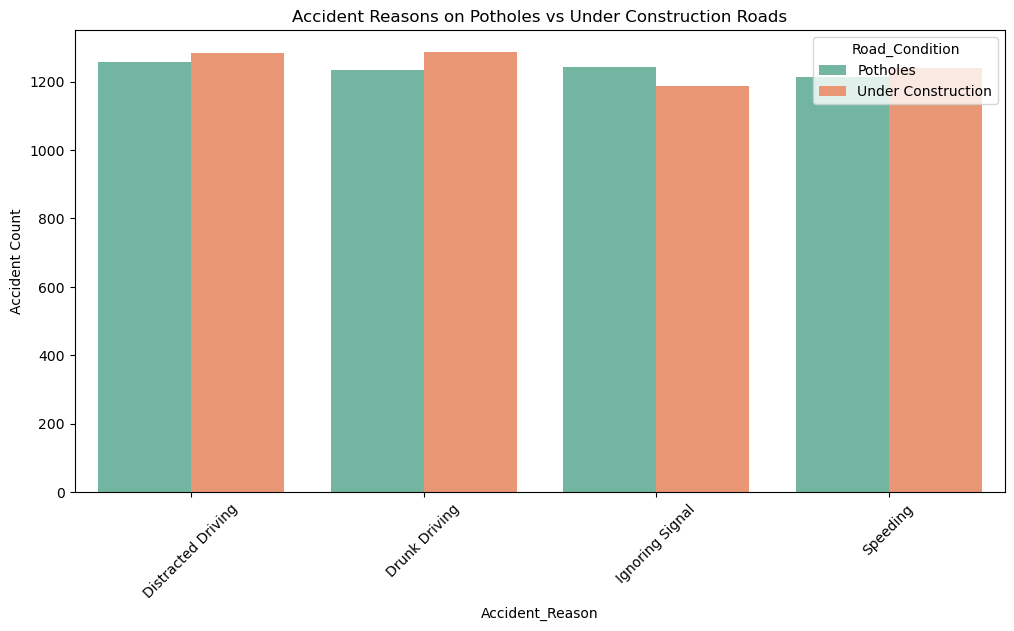

In [12]:
# Filter dataset for potholes or under construction
road_condition_df = df[df['Road_Condition'].isin(['Potholes', 'Under Construction'])]

# Count accident reasons by road type
reason_distribution = road_condition_df.groupby(['Road_Condition', 'Accident_Reason']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=reason_distribution, x='Accident_Reason', y='Count', hue='Road_Condition', palette="Set2")
plt.title("Accident Reasons on Potholes vs Under Construction Roads")
plt.xticks(rotation=45)
plt.ylabel("Accident Count")
plt.show()


C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\696415380.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fatality_rate, x='Weather_Condition', y='Fatality_Rate', palette="viridis")


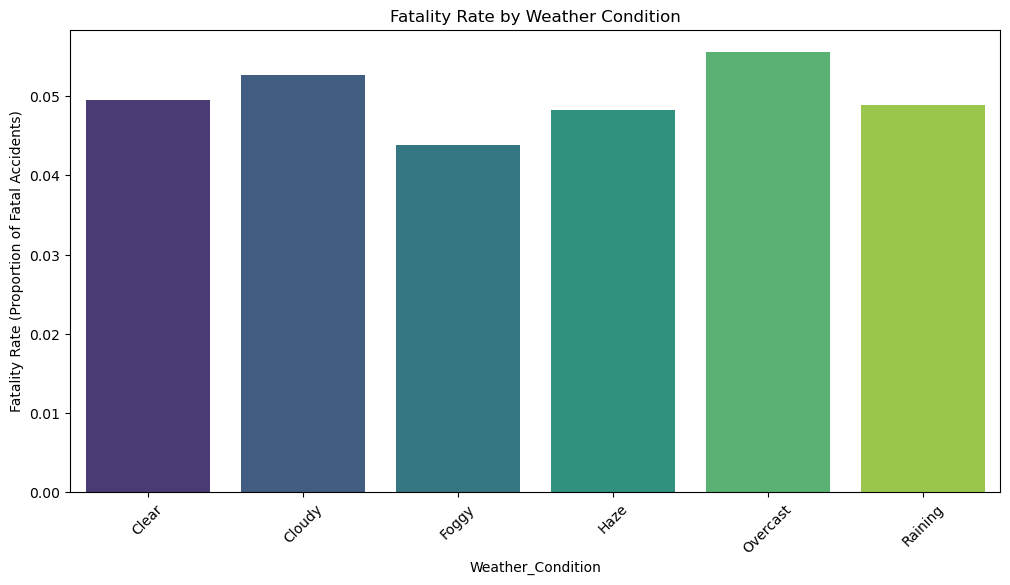

Fatality rates in Foggy/Haze conditions:
  Weather_Condition  Fatality_Rate
2             Foggy       0.043800
3              Haze       0.048247


In [13]:
# Create a Fatal flag
df['is_fatal'] = df['Number_of_Deaths'] > 0

# Group by weather and calculate fatality rate
fatality_rate = df.groupby('Weather_Condition')['is_fatal'].mean().reset_index()
fatality_rate.rename(columns={'is_fatal': 'Fatality_Rate'}, inplace=True)

# Plot fatality rate
plt.figure(figsize=(12,6))
sns.barplot(data=fatality_rate, x='Weather_Condition', y='Fatality_Rate', palette="viridis")
plt.title("Fatality Rate by Weather Condition")
plt.xticks(rotation=45)
plt.ylabel("Fatality Rate (Proportion of Fatal Accidents)")
plt.show()

# Highlight Foggy & Haze specifically
fog_haze_rate = fatality_rate[fatality_rate['Weather_Condition'].isin(['Foggy', 'Haze'])]
print("Fatality rates in Foggy/Haze conditions:")
print(fog_haze_rate)


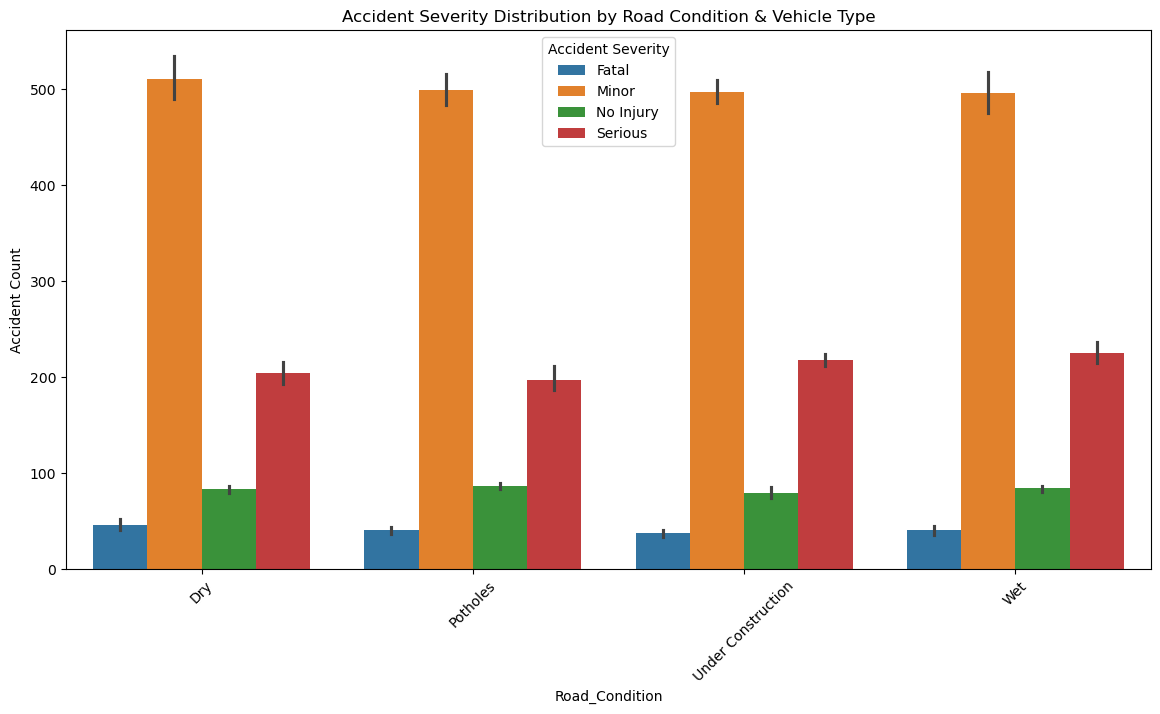

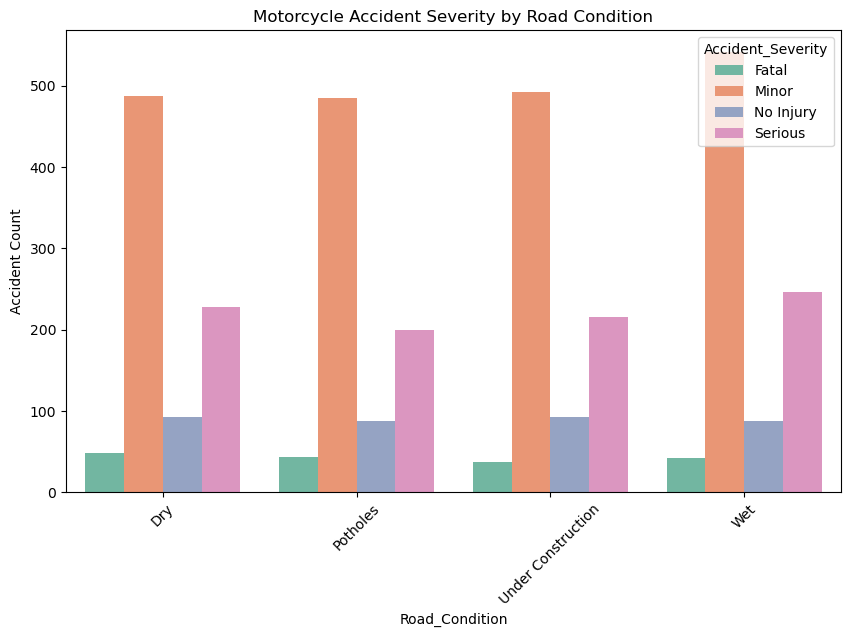

Chi-square Test (Motorcycles Road Condition vs Severity):
Chi2 = 4.52, p-value = 0.8743


In [14]:
# Group by Road Condition + Vehicle Type + Severity
interaction_df = df.groupby(['Road_Condition', 'Vehicle_Type', 'Accident_Severity']).size().reset_index(name='Count')

# Plot stacked bar: Road Condition × Vehicle Type
plt.figure(figsize=(14,7))
sns.barplot(data=interaction_df, x='Road_Condition', y='Count', hue='Accident_Severity')
plt.title("Accident Severity Distribution by Road Condition & Vehicle Type")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")
plt.show()

# Focus: Motorcycles on wet vs dry roads
motorcycle_df = df[df['Vehicle_Type'] == 'Motorcycle']
motorcycle_severity = motorcycle_df.groupby(['Road_Condition', 'Accident_Severity']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=motorcycle_severity, x='Road_Condition', y='Count', hue='Accident_Severity', palette="Set2")
plt.title("Motorcycle Accident Severity by Road Condition")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.show()

# --- Statistical Test (Chi-square for Motorcycles only) ---
from scipy.stats import chi2_contingency

contingency = pd.crosstab(motorcycle_df['Road_Condition'], motorcycle_df['Accident_Severity'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Test (Motorcycles Road Condition vs Severity):")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")


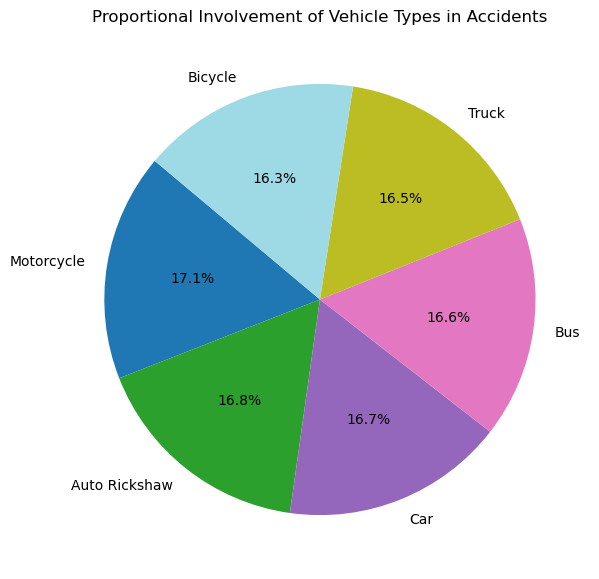

C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\1742115582.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette="Set2")


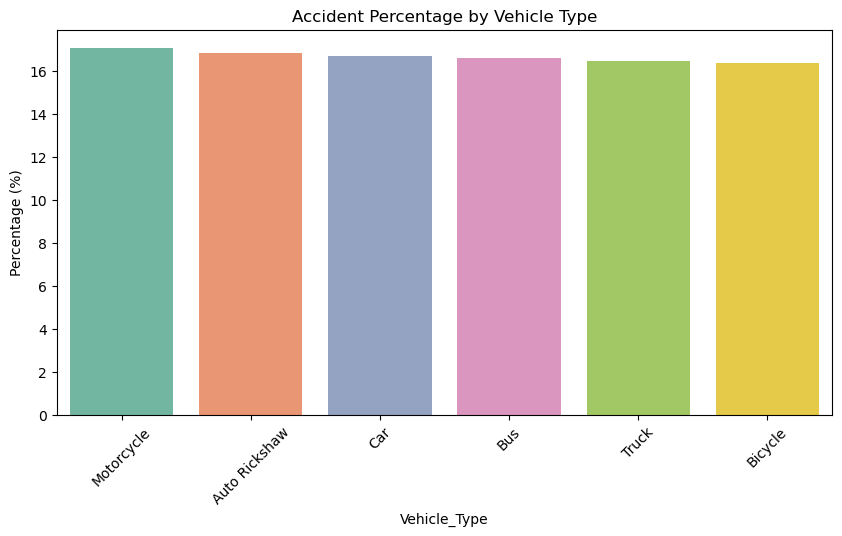

In [15]:
# Count accidents by vehicle type
vehicle_counts = df['Vehicle_Type'].value_counts(normalize=True) * 100

# Pie chart
plt.figure(figsize=(7,7))
vehicle_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap="tab20")
plt.title("Proportional Involvement of Vehicle Types in Accidents")
plt.ylabel("")
plt.show()

# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette="Set2")
plt.title("Accident Percentage by Vehicle Type")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()


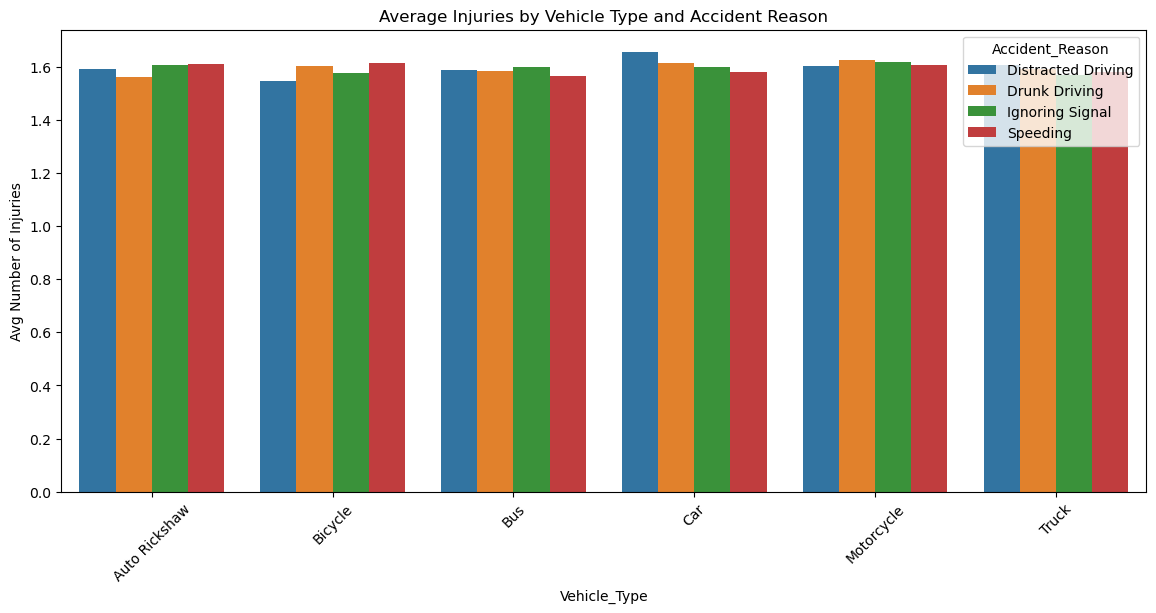

In [16]:
injuries_df = df.groupby(['Vehicle_Type', 'Accident_Reason'])['Number_of_Injuries'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=injuries_df, x='Vehicle_Type', y='Number_of_Injuries', hue='Accident_Reason', palette="tab10")
plt.title("Average Injuries by Vehicle Type and Accident Reason")
plt.ylabel("Avg Number of Injuries")
plt.xticks(rotation=45)
plt.show()




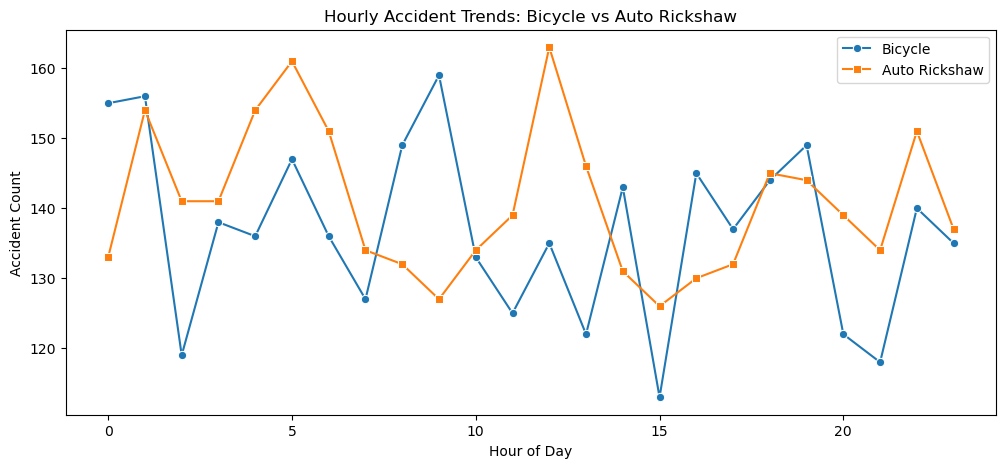

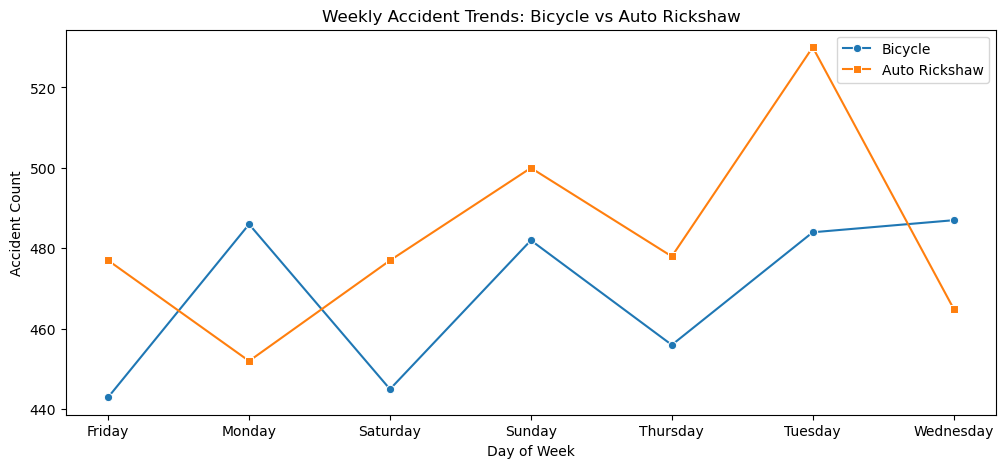

In [17]:
# Filter dataset
bicycle_df = df[df['Vehicle_Type'] == 'Bicycle']
auto_df = df[df['Vehicle_Type'] == 'Auto Rickshaw']

# Hourly trend
plt.figure(figsize=(12,5))
sns.lineplot(data=bicycle_df.groupby('Hour_of_Day').size(), label="Bicycle", marker="o")
sns.lineplot(data=auto_df.groupby('Hour_of_Day').size(), label="Auto Rickshaw", marker="s")
plt.title("Hourly Accident Trends: Bicycle vs Auto Rickshaw")
plt.xlabel("Hour of Day")
plt.ylabel("Accident Count")
plt.legend()
plt.show()

# Daily trend (Day_of_Week must exist in df)
plt.figure(figsize=(12,5))
sns.lineplot(data=bicycle_df.groupby('Day_of_Week').size(), label="Bicycle", marker="o")
sns.lineplot(data=auto_df.groupby('Day_of_Week').size(), label="Auto Rickshaw", marker="s")
plt.title("Weekly Accident Trends: Bicycle vs Auto Rickshaw")
plt.xlabel("Day of Week")
plt.ylabel("Accident Count")
plt.legend()
plt.show()


C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\3482226153.py:48: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from current font.
  plt.tight_layout()
C:\Users\BHOOMIKA_B_G\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


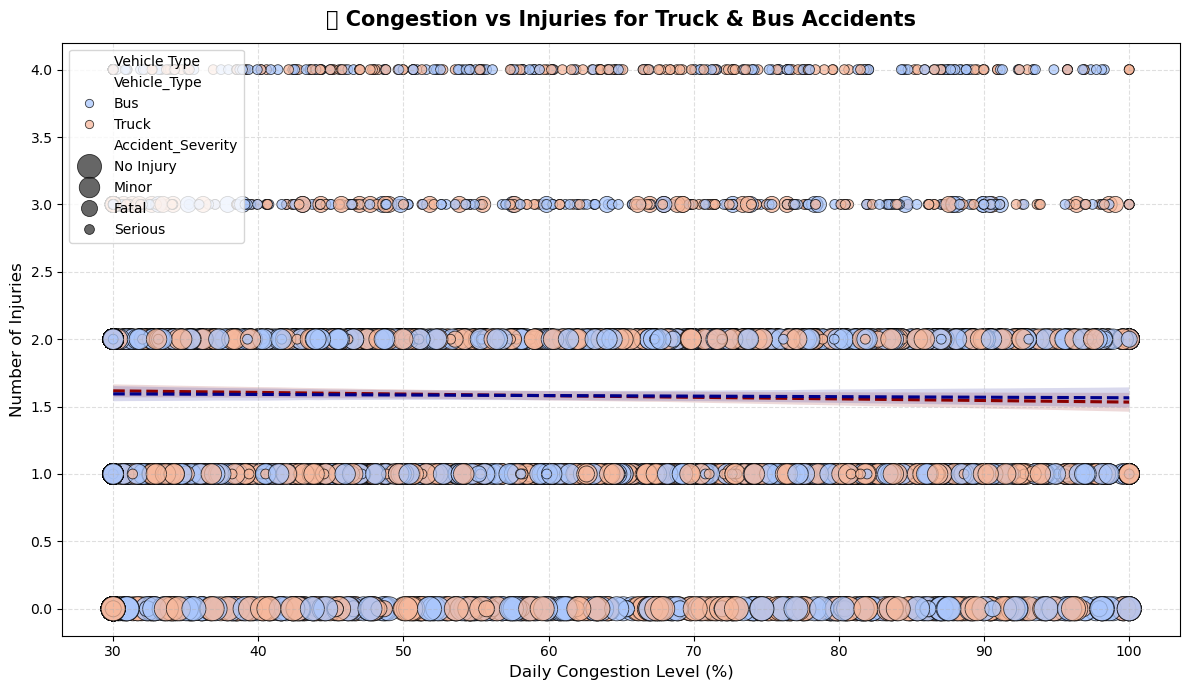

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter large vehicles
large_vehicle_df = df[df['Vehicle_Type'].isin(['Truck', 'Bus'])]

plt.figure(figsize=(12,7))

# Enhanced scatter plot with size and color mapping
sns.scatterplot(
    data=large_vehicle_df,
    x='Daily_Congestion_Level',
    y='Number_of_Injuries',
    hue='Vehicle_Type',
    size='Accident_Severity',   # size points by severity if coded
    sizes=(50, 300),
    alpha=0.75,
    palette='coolwarm',         # gradient color for nice contrast
    edgecolor='k',
    linewidth=0.6
)

# Add regression lines for each vehicle type (trend)
sns.regplot(
    data=large_vehicle_df[large_vehicle_df['Vehicle_Type'] == 'Truck'],
    x='Daily_Congestion_Level',
    y='Number_of_Injuries',
    scatter=False,
    color='darkred',
    line_kws={"linestyle":"--", "label":"Truck Trend"}
)

sns.regplot(
    data=large_vehicle_df[large_vehicle_df['Vehicle_Type'] == 'Bus'],
    x='Daily_Congestion_Level',
    y='Number_of_Injuries',
    scatter=False,
    color='darkblue',
    line_kws={"linestyle":"--", "label":"Bus Trend"}
)

# Customize the layout
plt.title("🚚 Congestion vs Injuries for Truck & Bus Accidents", fontsize=15, weight='bold', pad=12)
plt.xlabel("Daily Congestion Level (%)", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Vehicle Type", loc='upper left')
plt.tight_layout()
plt.show()



C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\2939846040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=injury_severity, x='Accident_Severity', y='Number_of_Injuries', palette="Set2")


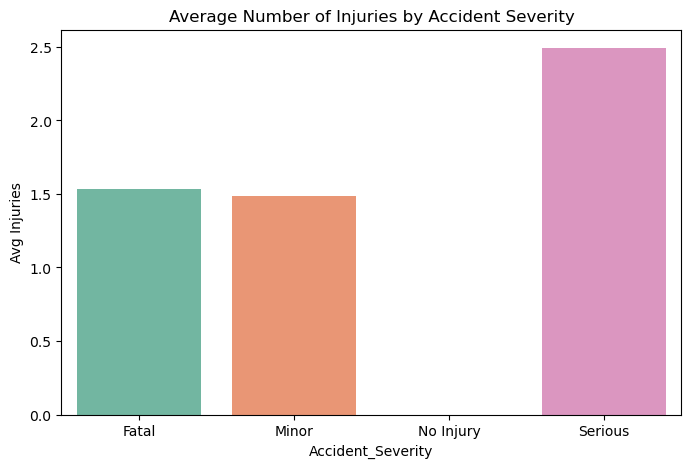

In [19]:
injury_severity = df.groupby('Accident_Severity')['Number_of_Injuries'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=injury_severity, x='Accident_Severity', y='Number_of_Injuries', palette="Set2")
plt.title("Average Number of Injuries by Accident Severity")
plt.ylabel("Avg Injuries")
plt.show()


C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\417958588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fatal_reasons.head(10), x='Accident_Reason', y='Count', palette="Reds_r")


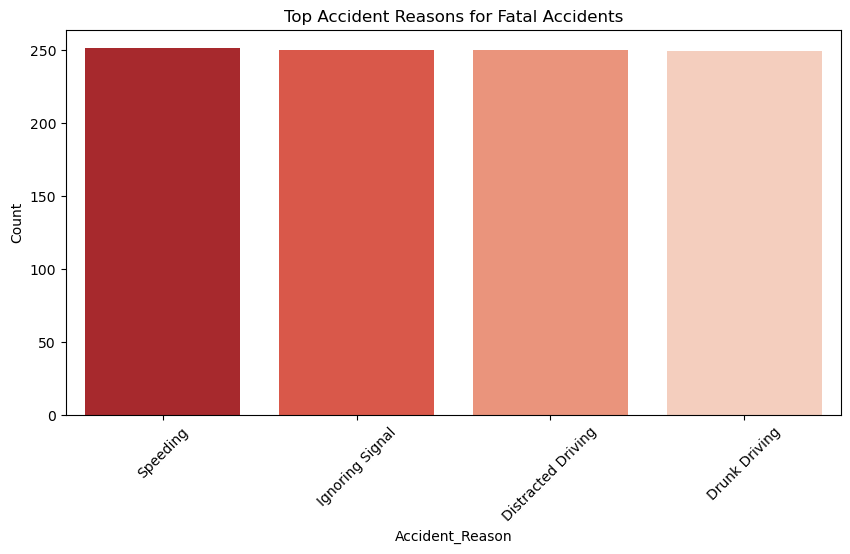

In [20]:
fatal_reasons = df[df['Number_of_Deaths'] > 0]['Accident_Reason'].value_counts().reset_index()
fatal_reasons.columns = ['Accident_Reason', 'Count']

plt.figure(figsize=(10,5))
sns.barplot(data=fatal_reasons.head(10), x='Accident_Reason', y='Count', palette="Reds_r")
plt.title("Top Accident Reasons for Fatal Accidents")
plt.xticks(rotation=45)
plt.show()


C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\3511373519.py:33: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  plt.tight_layout()
C:\Users\BHOOMIKA_B_G\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


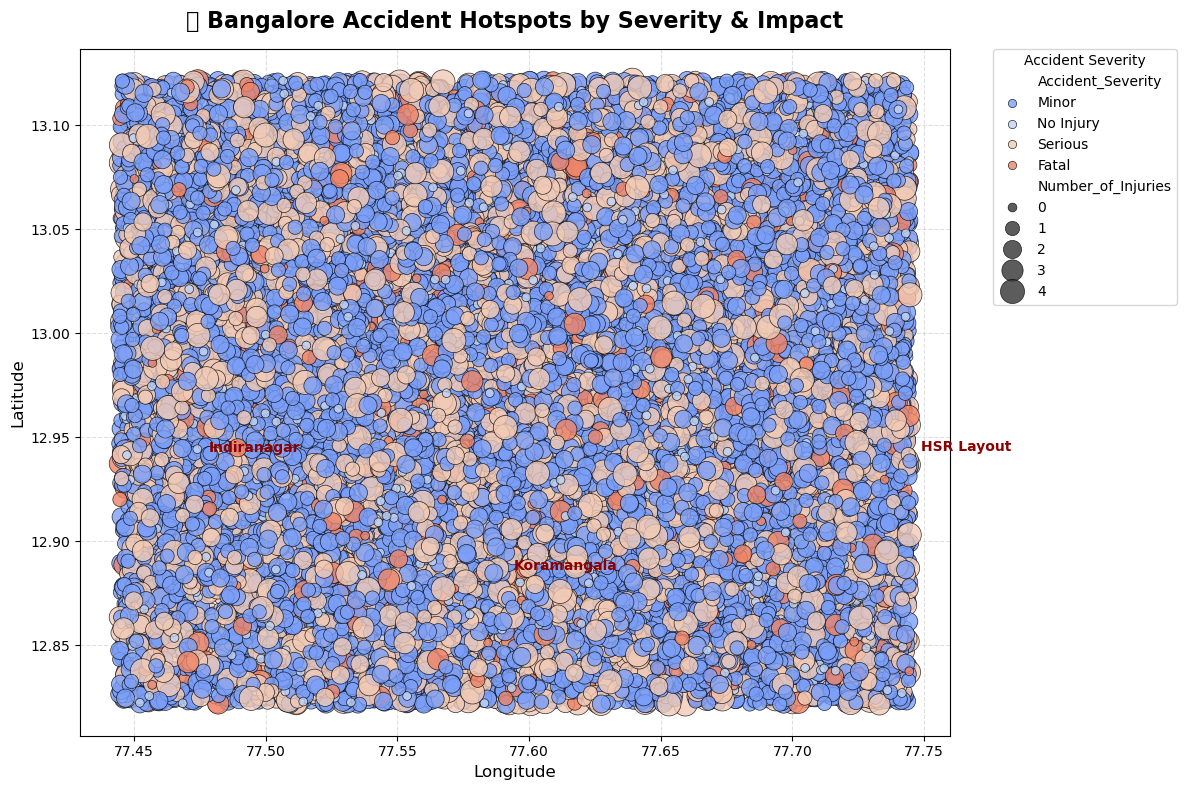

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# Enhanced scatter plot with size, color, and style
sns.scatterplot(
    data=df,
    x='Longitude',
    y='Latitude',
    hue='Accident_Severity',
    size='Number_of_Injuries',   # Bigger point = more injuries
    sizes=(40, 300),
    alpha=0.8,
    palette='coolwarm',          # Smooth severity gradient
    edgecolor='k',               # Outline each point
    linewidth=0.5
)

# Add background grid and styling
plt.title("🚨 Bangalore Accident Hotspots by Severity & Impact", fontsize=16, weight='bold', pad=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Accident Severity", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Annotate top accident cluster areas (optional)
top_locations = df['Location'].value_counts().head(3).index
for loc in top_locations:
    sample = df[df['Location'] == loc].iloc[0]
    plt.text(sample['Longitude'] + 0.005, sample['Latitude'] + 0.005, loc, fontsize=10, weight='bold', color='darkred')

plt.tight_layout()
plt.show()



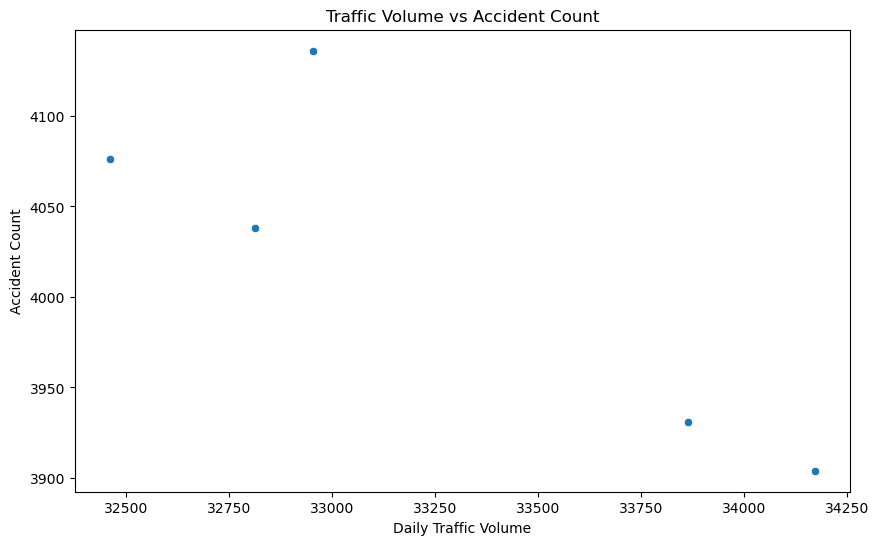

In [22]:
traffic_corr = df.groupby('Location').size().reset_index(name='Accident_Count')
traffic_corr = traffic_corr.merge(df.groupby('Location')['Daily_Traffic_Volume'].mean().reset_index(),
                                  on='Location')

plt.figure(figsize=(10,6))
sns.scatterplot(data=traffic_corr, x='Daily_Traffic_Volume', y='Accident_Count')
plt.title("Traffic Volume vs Accident Count")
plt.xlabel("Daily Traffic Volume")
plt.ylabel("Accident Count")
plt.show()


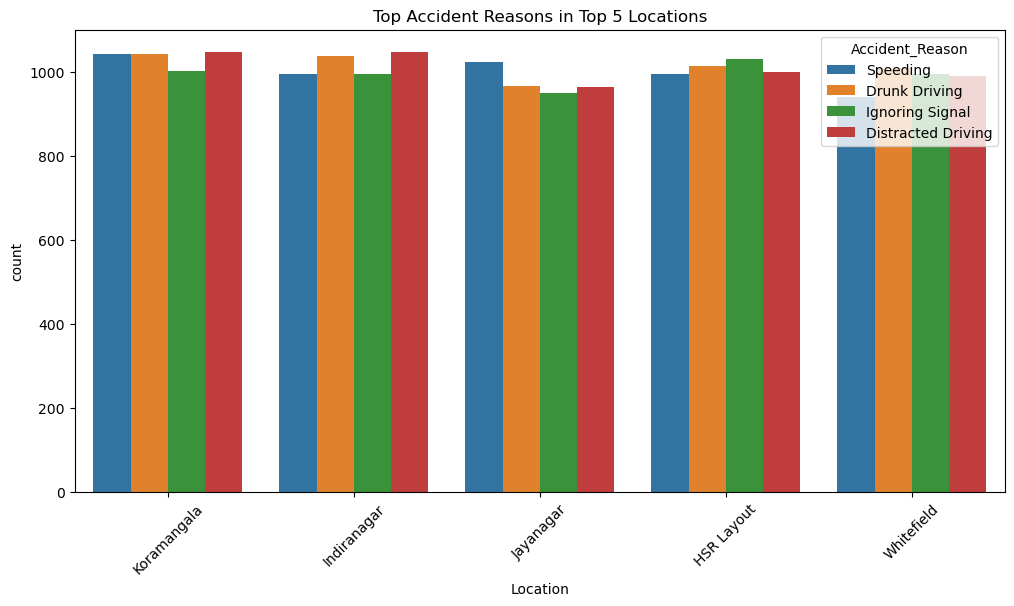

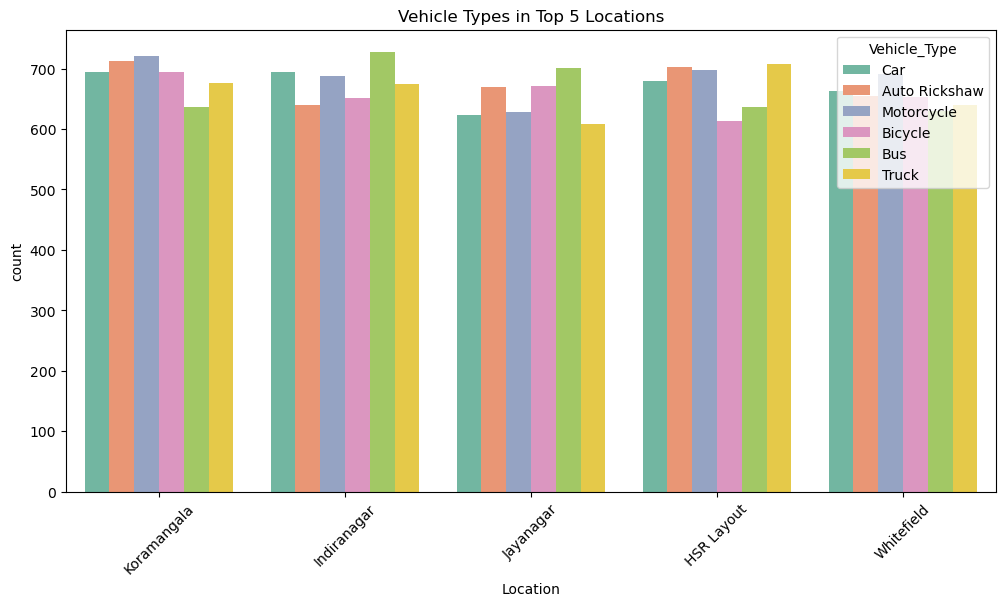

In [23]:
# Top 5 accident locations
top_locations = df['Location'].value_counts().head(5).index
hotspot_df = df[df['Location'].isin(top_locations)]

plt.figure(figsize=(12,6))
sns.countplot(data=hotspot_df, x='Location', hue='Accident_Reason', palette="tab10")
plt.title("Top Accident Reasons in Top 5 Locations")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=hotspot_df, x='Location', hue='Vehicle_Type', palette="Set2")
plt.title("Vehicle Types in Top 5 Locations")
plt.xticks(rotation=45)
plt.show()


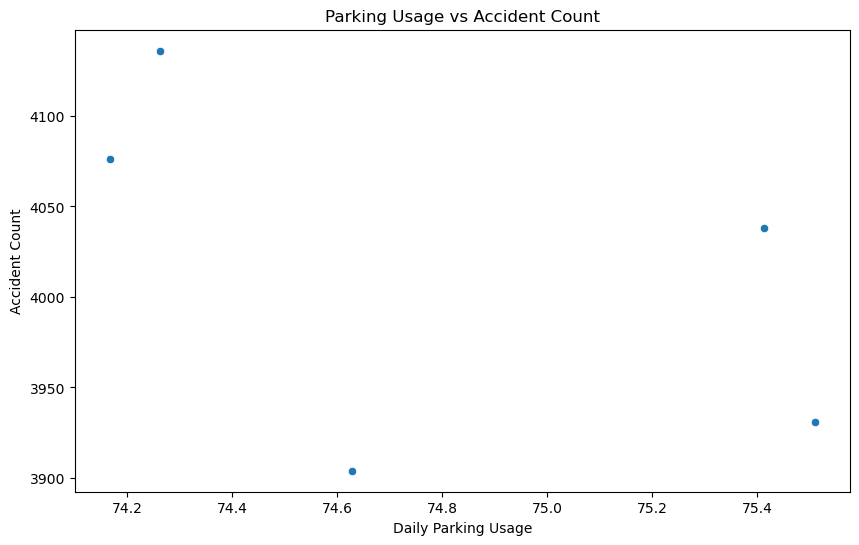

In [24]:
parking_corr = df.groupby('Location').size().reset_index(name='Accident_Count')
parking_corr = parking_corr.merge(df.groupby('Location')['Daily_Parking_Usage'].mean().reset_index(),
                                  on='Location')

plt.figure(figsize=(10,6))
sns.scatterplot(data=parking_corr, x='Daily_Parking_Usage', y='Accident_Count')
plt.title("Parking Usage vs Accident Count")
plt.xlabel("Daily Parking Usage")
plt.ylabel("Accident Count")
plt.show()



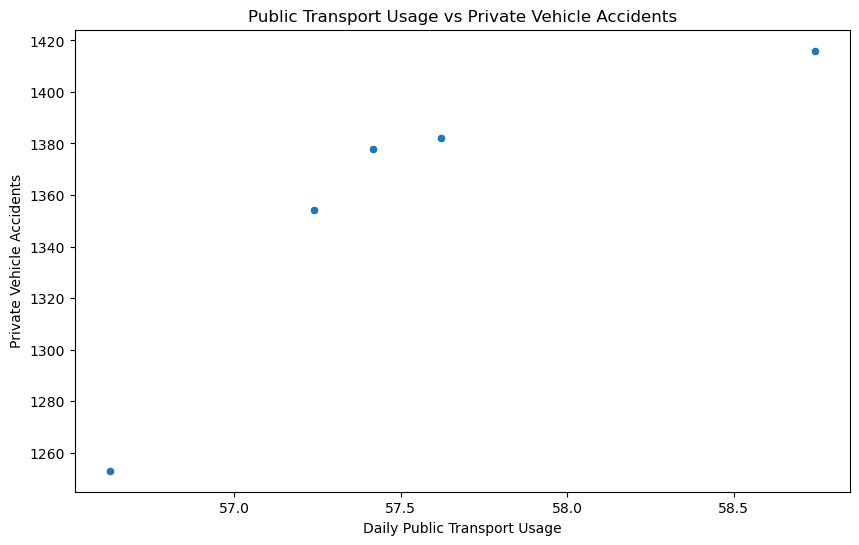

In [25]:
# Filter private vehicles (Car, Motorcycle, etc.)
private_df = df[df['Vehicle_Type'].isin(['Car','Motorcycle','Scooter'])]

pt_corr = private_df.groupby('Location').size().reset_index(name='Private_Accidents')
pt_corr = pt_corr.merge(df.groupby('Location')['Daily_Public_Transport_Usage'].mean().reset_index(),
                        on='Location')

plt.figure(figsize=(10,6))
sns.scatterplot(data=pt_corr, x='Daily_Public_Transport_Usage', y='Private_Accidents')
plt.title("Public Transport Usage vs Private Vehicle Accidents")
plt.xlabel("Daily Public Transport Usage")
plt.ylabel("Private Vehicle Accidents")
plt.show()


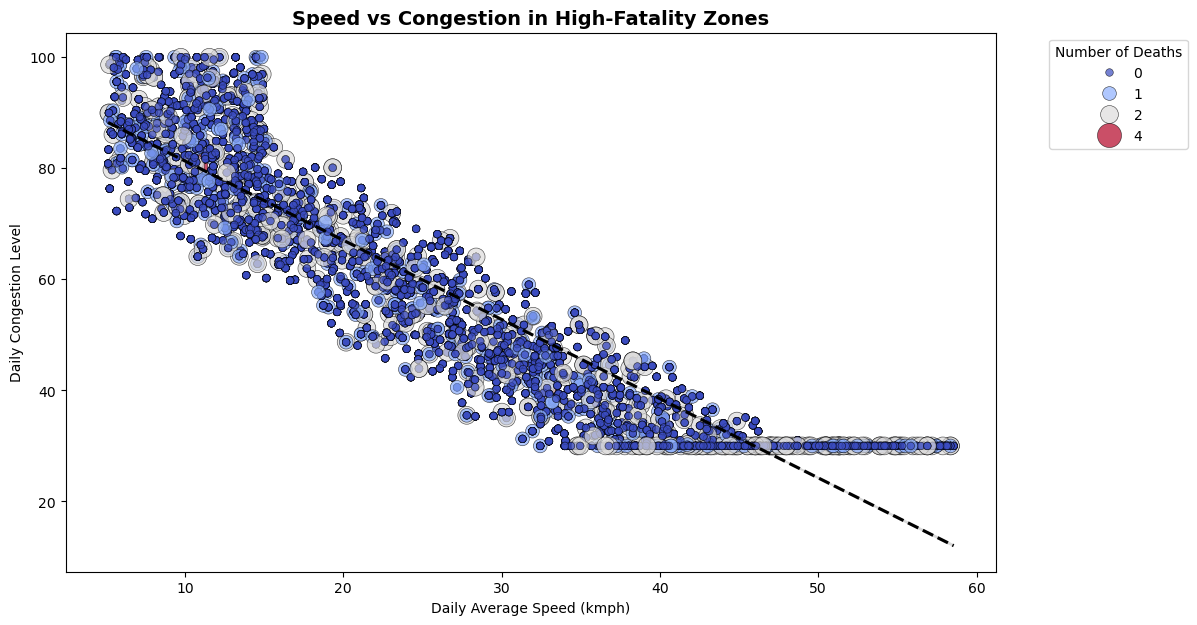

In [26]:
plt.figure(figsize=(12,7))
scatter = sns.scatterplot(
    data=df, 
    x='Daily_Average_Speed', 
    y='Daily_Congestion_Level', 
    size='Number_of_Deaths', 
    hue='Number_of_Deaths',
    sizes=(30, 300),   # make points more distinct
    palette="coolwarm", # better gradient
    alpha=0.7,
    edgecolor="k"
)

# Add a regression line to see trend
sns.regplot(
    data=df, 
    x='Daily_Average_Speed', 
    y='Daily_Congestion_Level', 
    scatter=False, 
    color="black", 
    line_kws={"linestyle":"--"}
)

plt.title("Speed vs Congestion in High-Fatality Zones", fontsize=14, weight='bold')
plt.xlabel("Daily Average Speed (kmph)")
plt.ylabel("Daily Congestion Level")
plt.legend(title="Number of Deaths", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [28]:
import numpy as np

def assign_age(vehicle_type):
    if vehicle_type in ['Car']:
        # Cars → 10% underage (15–17), 90% legal (18–70)
        if np.random.rand() < 0.10:
            return np.random.choice(range(15, 18))
        else:
            return np.random.choice(range(18, 71))
    
    elif vehicle_type in ['Motorcycle', 'Scooter']:
        # Bikes → 15% underage (15–17), 85% legal (18–70)
        if np.random.rand() < 0.15:
            return np.random.choice(range(15, 18))
        else:
            return np.random.choice(range(18, 71))
    
    elif vehicle_type in ['Bus', 'Truck', 'Auto Rickshaw']:
        # Always legal (18–65)
        return np.random.choice(range(18, 66))
    
    elif vehicle_type == 'Bicycle':
        # 5% very young (10–14), 95% 15–70
        if np.random.rand() < 0.05:
            return np.random.choice(range(10, 15))
        else:
            return np.random.choice(range(15, 71))
    
    else:
        # Default fallback
        return np.random.choice(range(16, 71))

# Add the column
df['Driver_Age'] = df['Vehicle_Type'].apply(assign_age)




C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\2551455837.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=age_compare_df, x='Accident_Severity', y='Driver_Age', palette="coolwarm")


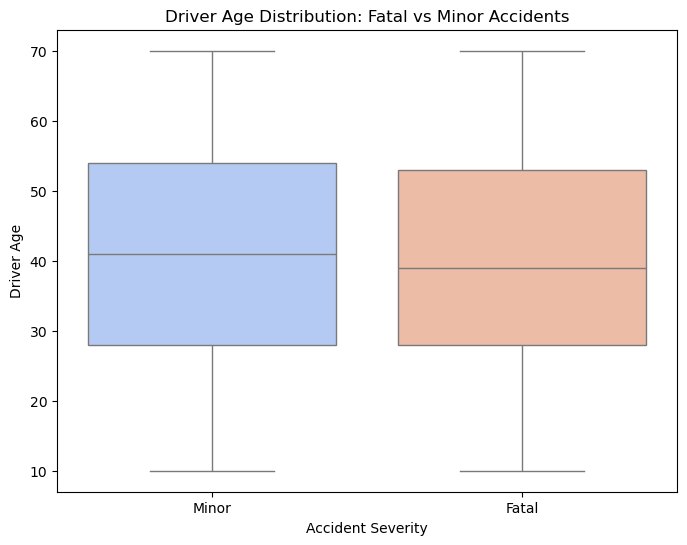

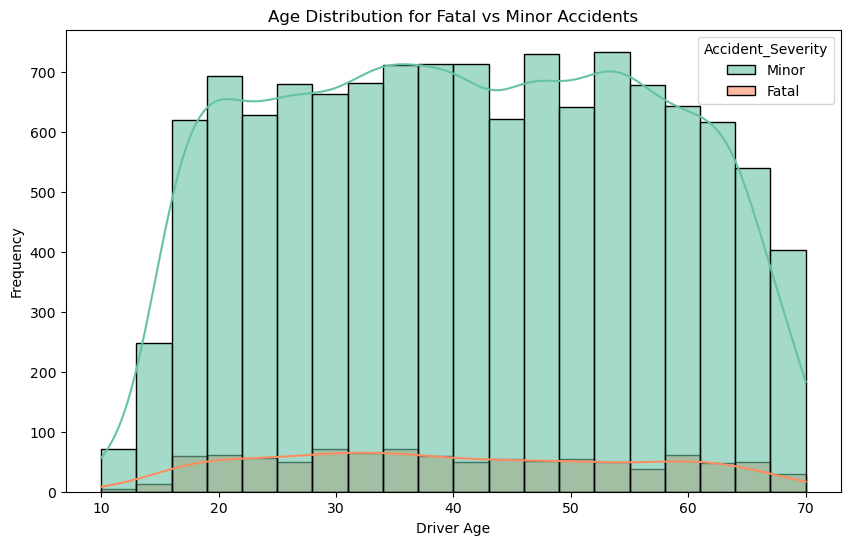

                     count       mean        std   min   25%   50%   75%   max
Accident_Severity                                                             
Fatal                996.0  40.238956  15.470092  10.0  28.0  39.0  53.0  70.0
Minor              12016.0  40.949567  15.456503  10.0  28.0  41.0  54.0  70.0


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only fatal and minor accidents
age_compare_df = df[df['Accident_Severity'].isin(['Fatal', 'Minor'])]

# --- 1️⃣ Box Plot ---
plt.figure(figsize=(8,6))
sns.boxplot(data=age_compare_df, x='Accident_Severity', y='Driver_Age', palette="coolwarm")
plt.title("Driver Age Distribution: Fatal vs Minor Accidents")
plt.xlabel("Accident Severity")
plt.ylabel("Driver Age")
plt.show()

# --- 2️⃣ Histogram (for clearer comparison) ---
plt.figure(figsize=(10,6))
sns.histplot(data=age_compare_df, x='Driver_Age', hue='Accident_Severity', bins=20, kde=True, palette="Set2", alpha=0.6)
plt.title("Age Distribution for Fatal vs Minor Accidents")
plt.xlabel("Driver Age")
plt.ylabel("Frequency")
plt.show()

# --- 3️⃣ Summary statistics ---
summary = age_compare_df.groupby('Accident_Severity')['Driver_Age'].describe()
print(summary)


In [30]:
import numpy as np

def assign_gender(vehicle_type):
    # Heavier vehicles are usually male-dominated
    if vehicle_type in ['Truck', 'Bus']:
        return np.random.choice(['Male', 'Female', 'Other'], p=[0.95, 0.04, 0.01])
    # Cars and scooters slightly more balanced
    elif vehicle_type in ['Car', 'Scooter']:
        return np.random.choice(['Male', 'Female', 'Other'], p=[0.8, 0.18, 0.02])
    # Motorcycles: mostly male, few female riders
    elif vehicle_type == 'Motorcycle':
        return np.random.choice(['Male', 'Female', 'Other'], p=[0.9, 0.09, 0.01])
    # Auto rickshaw drivers are mostly male
    elif vehicle_type == 'Auto Rickshaw':
        return np.random.choice(['Male', 'Female', 'Other'], p=[0.97, 0.02, 0.01])
    # Bicycles and others: open distribution
    else:
        return np.random.choice(['Male', 'Female', 'Other'], p=[0.7, 0.28, 0.02])

# Apply the function to every row of your dataset
df['Gender'] = df['Vehicle_Type'].apply(assign_gender)


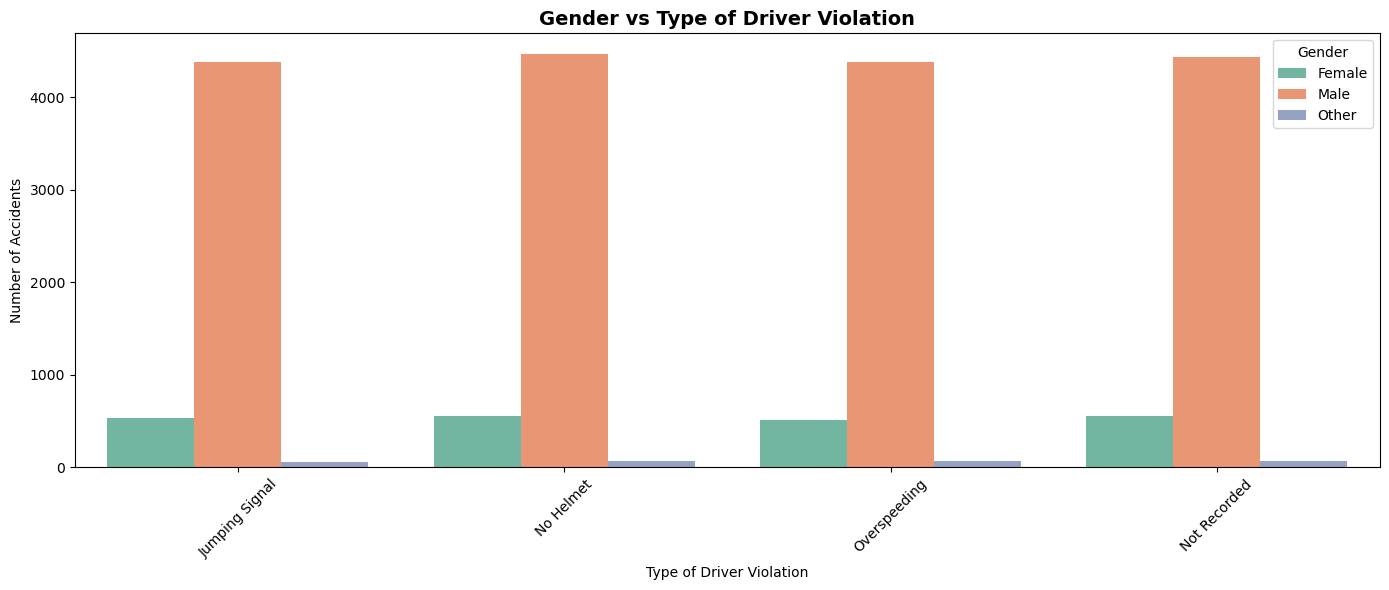

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.countplot(
    data=df,
    x='Driver_Violation',
    hue='Gender',
    palette='Set2'
)
plt.title("Gender vs Type of Driver Violation", fontsize=14, weight='bold')
plt.xlabel("Type of Driver Violation")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()



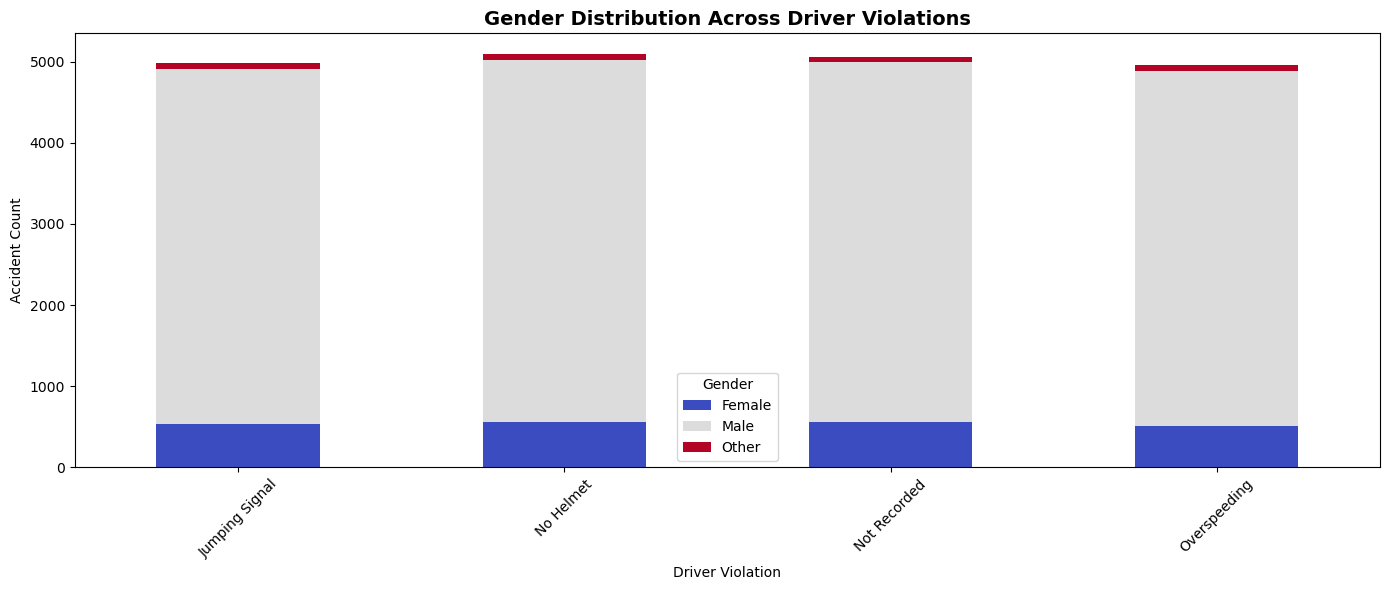

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of violations per gender
gender_violation = df.groupby(['Driver_Violation', 'Gender']).size().unstack(fill_value=0)

# Plot stacked bars
gender_violation.plot(
    kind='bar',
    stacked=True,
    figsize=(14,6),
    colormap='coolwarm'
)

plt.title("Gender Distribution Across Driver Violations", fontsize=14, weight='bold')
plt.xlabel("Driver Violation")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


In [35]:
import numpy as np

def assign_lanes(vehicle_type):
    if vehicle_type in ['Truck', 'Bus']:
        return np.random.choice([4, 5, 6], p=[0.3, 0.4, 0.3])  # Highways
    elif vehicle_type in ['Car', 'Auto Rickshaw']:
        return np.random.choice([2, 3, 4], p=[0.4, 0.4, 0.2])  # City roads
    elif vehicle_type in ['Motorcycle', 'Scooter', 'Bicycle']:
        return np.random.choice([1, 2], p=[0.6, 0.4])  # Small roads
    else:
        return np.random.choice([2, 3, 4])  # Default

# Add column
df['Number_of_Lanes'] = df['Vehicle_Type'].apply(assign_lanes)

# Quick check
print(df['Number_of_Lanes'].value_counts())


Number_of_Lanes
2    5410
1    3995
4    3391
3    2729
5    2604
6    1956
Name: count, dtype: int64


C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\220468391.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\BHOOMIKA_B_G\AppData\Local\Temp\ipykernel_9552\220468391.py:42: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from current font.
  plt.tight_layout()
C:\Users\BHOOMIKA_B_G\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


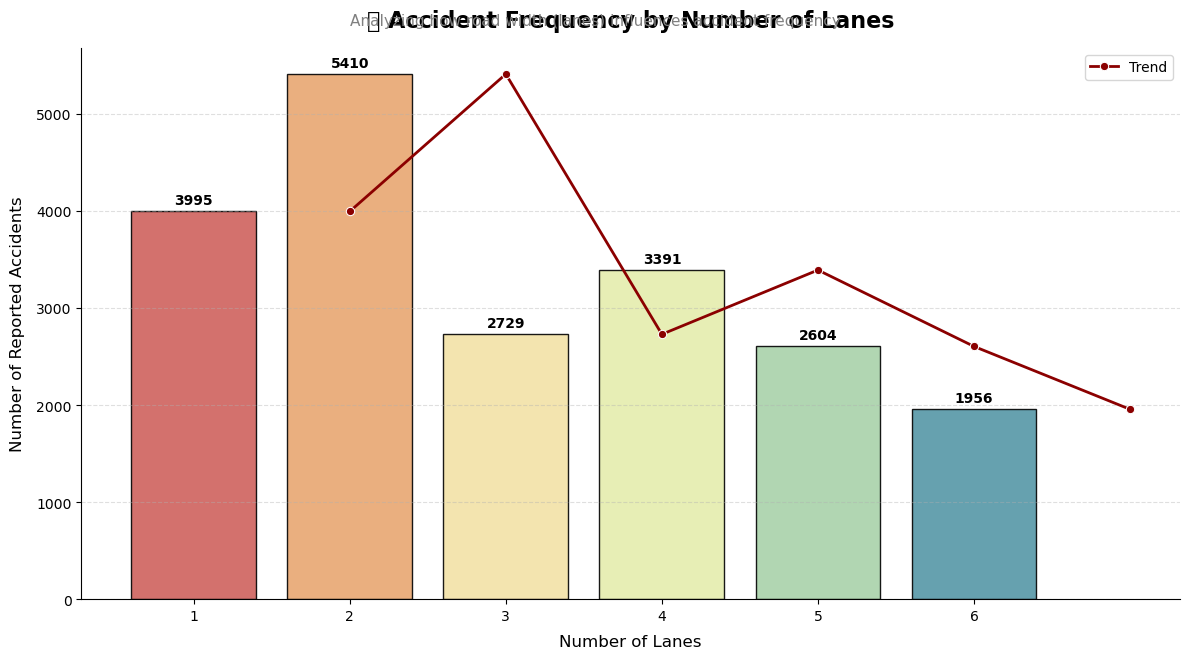

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort lane categories for better order
lane_order = sorted(df['Number_of_Lanes'].unique())

plt.figure(figsize=(12,7))

# 💡 Add color contrast + better visual balance
ax = sns.countplot(
    data=df,
    x='Number_of_Lanes',
    order=lane_order,
    palette='Spectral',
    edgecolor='black',
    alpha=0.9
)

# --- Add value labels on each bar ---
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, weight='bold', color='black')

# --- Add trend line (for visual storytelling) ---
sns.lineplot(
    data=df['Number_of_Lanes'].value_counts().sort_index(),
    marker='o',
    color='darkred',
    linewidth=2,
    label='Trend',
    ax=ax
)

# --- Add plot styling ---
plt.title("🛣️ Accident Frequency by Number of Lanes", fontsize=16, weight='bold', pad=15)
plt.suptitle("Analyzing how road width (lanes) influences accident frequency", fontsize=11, color='gray', y=0.93)
plt.xlabel("Number of Lanes", fontsize=12, labelpad=8)
plt.ylabel("Number of Reported Accidents", fontsize=12, labelpad=8)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()
